<a href="https://colab.research.google.com/github/gongx030/Etv2_pioneer/blob/master/R7_Etv2_pathway_MEF_clusters_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this notebook is to look at the pathways to see the difference between MEF NoDox cluster 1 and cluster 2

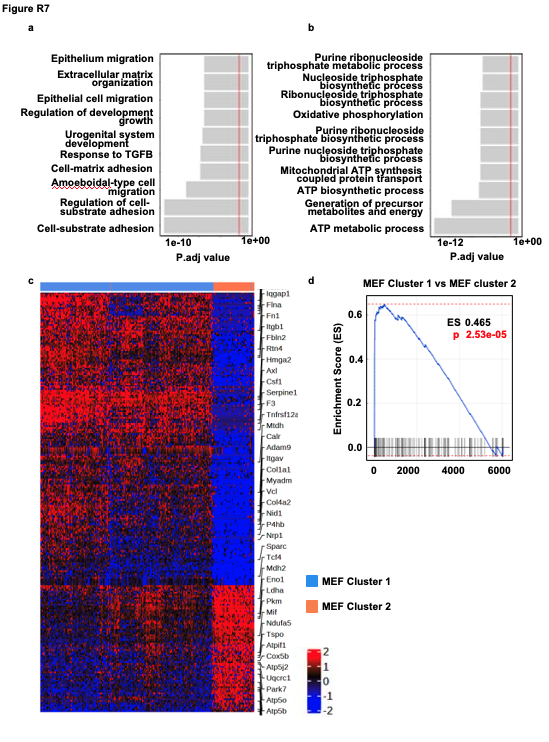

In [ ]:
start_time0 <- Sys.time()

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)
system('apt-get install libcairo2-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

### Install R packages

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c(
  'SummarizedExperiment', 'rhdf5', 'SingleCellExperiment', 'limma', 'goseq', 
  'stringr', 'ggplot2', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db',
  'wordcloud', 'plotrix', 'DESeq2','fgsea','cowplot','clusterProfiler','ggsci'
), Ncpus = 2)
install.packages(c('farver', "Seurat"), Ncpus = 2)
install.packages('devtools')
devtools::install_github('rstudio/reticulate')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'stringr' 'ggplot2'”
Installing package(s) 'BiocVersion', 'SummarizedExperiment', 'rhdf5',
  'SingleCellExperiment', 'limma', 'goseq',
  'TxDb.Mmusculus.UCSC.mm10.knownGene', 'org.Mm.eg.db', 'wordcloud', 'plotrix',
  'DESeq2', 'fgsea', 'cowplot', 'clusterProfiler', 'ggsci'

also installing the dependencies ‘gridGraphics’, ‘Rhtslib’, ‘rjson’, ‘filelock’, ‘formatR’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘ggplotify’, ‘patchwork’, ‘lazyeval’, ‘zlibbioc’, ‘bitops’, ‘XML’, ‘Rsamtools’, ‘GenomicAlignments’, ‘restfulr’, ‘plogr’, ‘png’, ‘BiocFileCache’, ‘lambda.r’, ‘futile.opti


✔  checking for file ‘/tmp/RtmpfgzoE6/remotes4e4cf7ba53/rstudio-reticulate-277f410/DESCRIPTION’
─  preparing ‘reticulate’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘reticulate_1.22-9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
devtools::install_github("jokergoo/ComplexHeatmap")

iterators    (NA     -> 1.0.13) [CRAN]
foreach      (NA     -> 1.5.1 ) [CRAN]
GlobalOpt... (NA     -> 0.1.2 ) [CRAN]
shape        (NA     -> 1.4.6 ) [CRAN]
doParallel   (NA     -> 1.0.16) [CRAN]
digest       (0.6.27 -> 0.6.28) [CRAN]
clue         (NA     -> 0.3-59) [CRAN]
GetoptLong   (NA     -> 1.0.5 ) [CRAN]
circlize     (NA     -> 0.4.13) [CRAN]


Installing 9 packages: iterators, foreach, GlobalOptions, shape, doParallel, digest, clue, GetoptLong, circlize

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpfgzoE6/remotes4e24a9583/jokergoo-ComplexHeatmap-9c277dd/DESCRIPTION’
─  preparing ‘ComplexHeatmap’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘ComplexHeatmap_2.9.4.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
devtools::install_github('YuLab-SMU/ChIPseeker')

enrichplot   (1.12.2 -> d11b60bb6...) [GitHub]
pillar       (1.6.2  -> 1.6.3       ) [CRAN]
tibble       (3.1.4  -> 3.1.5       ) [CRAN]
lifecycle    (1.0.0  -> 1.0.1       ) [CRAN]
stringi      (1.7.4  -> 1.7.5       ) [CRAN]
hms          (1.1.0  -> 1.1.1       ) [CRAN]
openssl      (1.4.3  -> 1.4.5       ) [CRAN]
mime         (0.11   -> 0.12        ) [CRAN]
cpp11        (0.3.1  -> 0.4.0       ) [CRAN]
tidyr        (1.1.3  -> 1.1.4       ) [CRAN]
data.table   (1.14.0 -> 1.14.2      ) [CRAN]
TxDb.Hsap... (NA     -> 3.2.2       ) [CRAN]


Installing 11 packages: pillar, tibble, lifecycle, stringi, hms, openssl, mime, cpp11, tidyr, data.table, TxDb.Hsapiens.UCSC.hg19.knownGene

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





✔  checking for file ‘/tmp/RtmpfgzoE6/remotes4e6435ef43/GuangchuangYu-enrichplot-d11b60b/DESCRIPTION’
─  preparing ‘enrichplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘enrichplot_1.13.1.992.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpfgzoE6/remotes4e6a31f1f9/YuLab-SMU-ChIPseeker-e13e2b5/DESCRIPTION’
─  preparing ‘ChIPseeker’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ChIPseeker_1.29.1.990.tar.gz’ (2.5s)
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Load R packages

In [ ]:
library(SummarizedExperiment)
library(RColorBrewer)
library(plyr)
library(dplyr)
library(parallel)
library(ggplot2)
library(goseq)
library(stringr)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(wordcloud)
library(plotrix)
library(DESeq2)
library(fgsea)
library(cowplot)
library(Seurat)
library(clusterProfiler)
library(ChIPseeker)
library(SingleCellExperiment)
library(ggsci)
library(tidyverse)
library(magrittr)
library(ComplexHeatmap)
library(circlize)

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, ro

## Load processed scRNA-seq data

In [ ]:
se_file <- c(
  "sce" = "https://s3.msi.umn.edu/gongx030/etv2_pioneer/data/processed_Etv2_scRNAseq.rds")

In [ ]:
for (i in 1:length(se_file)){
  sprintf('wget -x -c -nH %s', se_file[i]) %>% system()
}
se_file <- gsub('https://s3.msi.umn.edu/', './', se_file)
message(sprintf('all se_file exist: %s', all(file.exists(se_file))))

all se_file exist: TRUE



In [ ]:
se <- lapply(se_file, function(s){s %>%
  readRDS()})

In [ ]:
sce <- se$sce


## Determine the number of clusters by running k-means on the scVI latent space

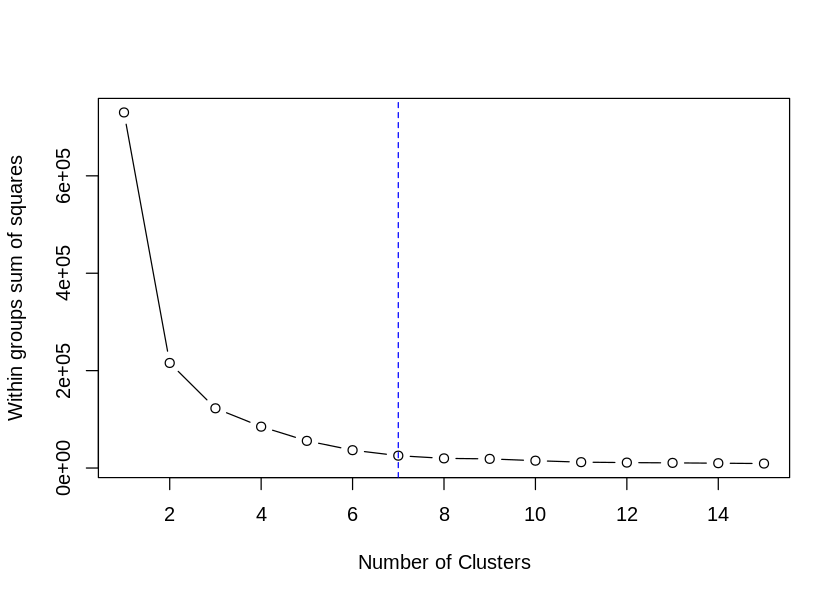

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 5)
wss <- (nrow(colData(sce)$umap)-1) * sum(apply(colData(sce)$umap, 2, var))
for (i in 2:15) wss[i] <- sum(kmeans(colData(sce)$umap,centers = i, nstart = 10)$withinss)
options(repr.plot.width=7, repr.plot.height=5)
plot(1:15, wss, type="b", xlab="Number of Clusters", ylab="Within groups sum of squares")
n_cluster <- 7
abline(v = n_cluster, col = 'blue', lty = 2)

In [ ]:
set.seed(1)
# it is important to set nstart to a large number to get a relatively robust clustering result. 
cls <- kmeans(colData(sce)$umap, n_cluster, nstart = 100)$cluster
table(cls, colData(sce)$group)
cls <- as.numeric(factor(cls, c(4, 5, 2, 3, 1, 7, 6)))
table(cls, colData(sce)$group)

   
cls MEF_NoDox MEF_Dox_D1 MEF_Dox_D2 MEF_Dox_D7a MEF_Dox_D7b
  1         1          0         17        1493           3
  2         0          6       1443           1           0
  3         0          4       1435          23           0
  4      2878        541         21           2           3
  5       657        381          1           0           0
  6         0          2          0           1         813
  7        26         14         19        5682           8

   
cls MEF_NoDox MEF_Dox_D1 MEF_Dox_D2 MEF_Dox_D7a MEF_Dox_D7b
  1      2878        541         21           2           3
  2       657        381          1           0           0
  3         0          6       1443           1           0
  4         0          4       1435          23           0
  5         1          0         17        1493           3
  6        26         14         19        5682           8
  7         0          2          0           1         813

In [ ]:
colData(sce)$cluster <- cls #Adding cluster information to colData(sce)

# New column joining group and cluster to later find markers only for MEF_NoDox in cluster 1 and 2

In [ ]:
colData(sce)$condition <- paste(colData(sce)$group, colData(sce)$cluster, sep = '_')

In [ ]:
colData(sce)

DataFrame with 15475 rows and 8 columns
                barcodes       group doublet_scores predicted_doublets
             <character>    <factor>      <numeric>          <logical>
1     AAACCTGTCTGTCTAT-1  MEF_Dox_D1      0.1233766              FALSE
2     AAACGGGGTAAACACA-1  MEF_Dox_D1      0.0725995              FALSE
3     AAACGGGTCGCGTAGC-1  MEF_Dox_D1      0.0780488              FALSE
4     AAAGATGGTCACCCAG-1  MEF_Dox_D1      0.0507812              FALSE
5     AAAGCAAAGAGCTATA-1  MEF_Dox_D1      0.2380952              FALSE
...                  ...         ...            ...                ...
15471 TTTATGCCATCCTAGA-1 MEF_Dox_D7b      0.1951220              FALSE
15472 TTTCCTCTCGTACCGG-1 MEF_Dox_D7b      0.0257104              FALSE
15473 TTTGGTTCATCTCGCT-1 MEF_Dox_D7b      0.0977444              FALSE
15474 TTTGGTTTCGTAGATC-1 MEF_Dox_D7b      0.1401274              FALSE
15475 TTTGGTTTCGTGGGAA-1 MEF_Dox_D7b      0.1951220              FALSE
                                  lat

# Converting Summarized experiment into a Seurat Objest

In [ ]:
sce = as(sce, "SingleCellExperiment")
print(sce)
rownames(sce) = rowData(sce)$name
colnames(sce)  = colData(sce)$barcodes
so = as.Seurat(sce, data = NULL)
so = CreateSeuratObject(counts = GetAssayData(so, slot = "counts"), meta.data = so@meta.data)
so[["percent.mt"]] = PercentageFeatureSet(so, pattern = "^mt-")
so[["percent.rpl"]] = PercentageFeatureSet(so, pattern = "^Rpl")
so[["percent.rps"]] = PercentageFeatureSet(so, pattern = "^Rps")
s.genes <- cc.genes$s.genes %>% str_to_title()
g2m.genes <- cc.genes$g2m.genes %>% str_to_title()
so <- CellCycleScoring(so, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)
rownames(sce) = rownames(so)
colnames(sce) = colnames(so)
so <- SetAssayData(object = so, slot = "scale.data", new.data = assays(sce)$scaled_counts) #Scaling
so <- SetAssayData(object = so, slot = "data", new.data = assays(sce)$normalized_counts) #Normalizing
so[["umap"]] <- CreateDimReducObject(embeddings = as.matrix(so@meta.data[,c("umap.V1", "umap.V2")]), key = "umap_", assay = DefaultAssay(so)) #assign UMAP calculated 
so

class: SingleCellExperiment 
dim: 17010 15475 
metadata(1): curves
assays(3): counts normalized_counts scaled_counts
rownames: NULL
rowData names(6): id name ... is_hvg clusters
colnames: NULL
colData names(8): barcodes group ... cluster condition
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):


Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“Non-unique cell names (colnames) present in the input matrix, making unique”
Warning message:
“The following features are not present in the object: Mlf1ip, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Fam64a, Hn1, not searching for symbol synonyms”


An object of class Seurat 
17010 features across 15475 samples within 1 assay 
Active assay: RNA (17010 features, 0 variable features)
 1 dimensional reduction calculated: umap

# Finding differntially expressed genes between cluster 1 & 2 MEF_NoDox

In [ ]:
Idents(so) <- 'condition'

In [ ]:
Clust1_2 = FindMarkers(so, ident.1 = 'MEF_NoDox_1', ident.2 = 'MEF_NoDox_2',test.use = "wilcox", only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.1)
Clust2_1 = FindMarkers(so, ident.1 = 'MEF_NoDox_2', ident.2 = 'MEF_NoDox_1', test.use = "wilcox", only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.1)

In [ ]:
head(Clust1_2)
head(Clust2_1)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Fn1,0.000000e+00,3.065210,0.993,0.207,0.000000e+00
Col1a2,0.000000e+00,3.297850,0.993,0.169,0.000000e+00
Fbln2,0.000000e+00,2.675652,0.991,0.167,0.000000e+00
Ahnak,5.240810e-306,2.450298,0.987,0.224,8.914618e-302
Sparc,5.537022e-287,2.187408,0.982,0.205,9.418474e-283
Ckap4,5.611045e-287,1.779178,0.952,0.085,9.544387e-283


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Lgals1,0.000000e+00,1.342993,1.000,1.000,0.000000e+00
Ubb,9.457933e-307,1.848015,1.000,0.994,1.608794e-302
S100a11,4.229608e-295,1.830384,1.000,0.991,7.194563e-291
Eno1,2.707022e-284,1.910912,0.988,0.950,4.604645e-280
Aldoa,9.874760e-274,1.843351,0.980,0.920,1.679697e-269
Pkm,1.122131e-262,1.868455,0.992,0.979,1.908745e-258


## Upregulated genes in cluster 1 and cluster 2

In [ ]:
# Cluster 1
up_1 <- Clust1_2 %>% 
        filter(p_val_adj < 0.05) %>%
        filter(avg_log2FC > 1)
# Cluster 2
up_2 <- Clust2_1 %>% 
        filter(p_val_adj < 0.05) %>%
        filter(avg_log2FC > 1)

In [ ]:
dim(up_1)

[1] 174   5

In [ ]:
dim(up_2)

[1] 75  5

# GO and KEGG enrichment for cluster 1 MEF_NoDox

In [ ]:
go_1 <- enrichGO(gene         = rownames(up_1),
                OrgDb         = org.Mm.eg.db,
                keyType       = 'SYMBOL',
                ont           = "BP",
                pAdjustMethod = "BH",
                #maxGSSize = 1000,
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05)

In [ ]:
go_1

#
# over-representation test
#
#...@organism 	 Mus musculus 
#...@ontology 	 BP 
#...@keytype 	 SYMBOL 
#...@gene 	 chr [1:174] "Fn1" "Col1a2" "Fbln2" "Ahnak" "Sparc" "Ckap4" "Ltbp1" ...
#...pvalues adjusted by 'BH' with cutoff <0.01 
#...324 enriched terms found
'data.frame':	324 obs. of  9 variables:
 $ ID         : chr  "GO:0031589" "GO:0010810" "GO:0045785" "GO:0010811" ...
 $ Description: chr  "cell-substrate adhesion" "regulation of cell-substrate adhesion" "positive regulation of cell adhesion" "positive regulation of cell-substrate adhesion" ...
 $ GeneRatio  : chr  "23/159" "19/159" "24/159" "15/159" ...
 $ BgRatio    : chr  "358/23355" "221/23355" "442/23355" "133/23355" ...
 $ pvalue     : num  4.29e-16 8.99e-16 4.04e-15 1.95e-14 2.73e-12 ...
 $ p.adjust   : num  1.36e-12 1.43e-12 4.29e-12 1.55e-11 1.74e-09 ...
 $ qvalue     : num  9.32e-13 9.79e-13 2.93e-12 1.06e-11 1.19e-09 ...
 $ geneID     : chr  "Fn1/Fbln2/Itgb1/P4hb/Nid1/Calr/Csf1/Col1a1/Flna/Itgav/Iqgap1/Thbs1/Vcl/Axl

# GO and KEGG enrichment for cluster 2 MEF_NoDox

In [ ]:
go_2 <- enrichGO(gene         = rownames(up_2),
                OrgDb         = org.Mm.eg.db,
                keyType       = 'SYMBOL',
                ont           = "BP",
                pAdjustMethod = "BH",
                #maxGSSize = 1000,
                pvalueCutoff  = 0.01,
                qvalueCutoff  = 0.05)

In [ ]:
go_2

#
# over-representation test
#
#...@organism 	 Mus musculus 
#...@ontology 	 BP 
#...@keytype 	 SYMBOL 
#...@gene 	 chr [1:75] "Lgals1" "Ubb" "S100a11" "Eno1" "Aldoa" "Pkm" "Hspa8" "Eif4a1" ...
#...pvalues adjusted by 'BH' with cutoff <0.01 
#...105 enriched terms found
'data.frame':	105 obs. of  9 variables:
 $ ID         : chr  "GO:0046034" "GO:0006091" "GO:0006754" "GO:0042776" ...
 $ Description: chr  "ATP metabolic process" "generation of precursor metabolites and energy" "ATP biosynthetic process" "mitochondrial ATP synthesis coupled proton transport" ...
 $ GeneRatio  : chr  "17/71" "17/71" "7/71" "5/71" ...
 $ BgRatio    : chr  "256/23355" "404/23355" "54/23355" "15/23355" ...
 $ pvalue     : num  1.70e-18 3.51e-15 2.80e-10 6.60e-10 9.59e-10 ...
 $ p.adjust   : num  3.01e-15 3.10e-12 1.65e-07 2.91e-07 2.94e-07 ...
 $ qvalue     : num  2.14e-15 2.20e-12 1.17e-07 2.07e-07 2.09e-07 ...
 $ geneID     : chr  "Eno1/Aldoa/Pkm/Hspa8/Mif/Gapdh/Atp5b/Atp5h/Atpif1/Atp5o/Atp5j2/Uqcrc1/Cox5

# Bar plot for the top 10 GO enriched terms excluding terms that are positive or negative regulations of a pathway or biological process

In [ ]:
go_1_sub <- go_1 %>% 
arrange(p.adjust) %>% 
filter(!str_detect(Description, 'negative|positive'))
go_1_sub <- go_1_sub[1:10]
go_2_sub <- go_2 %>% 
arrange(p.adjust) %>%
filter(!str_detect(Description, 'negative|positive'))
go_2_sub <- go_2_sub[1:10]

# Double checking the top 10 terms from MEF_NoDox cluster 1 enriched terms is not present in MEF_NoDox cluster 2 terms

In [ ]:
go_2[grepl(paste(go_1_sub$Description, collapse = '|'), go_2$Description),]

ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>


## Cluster 1

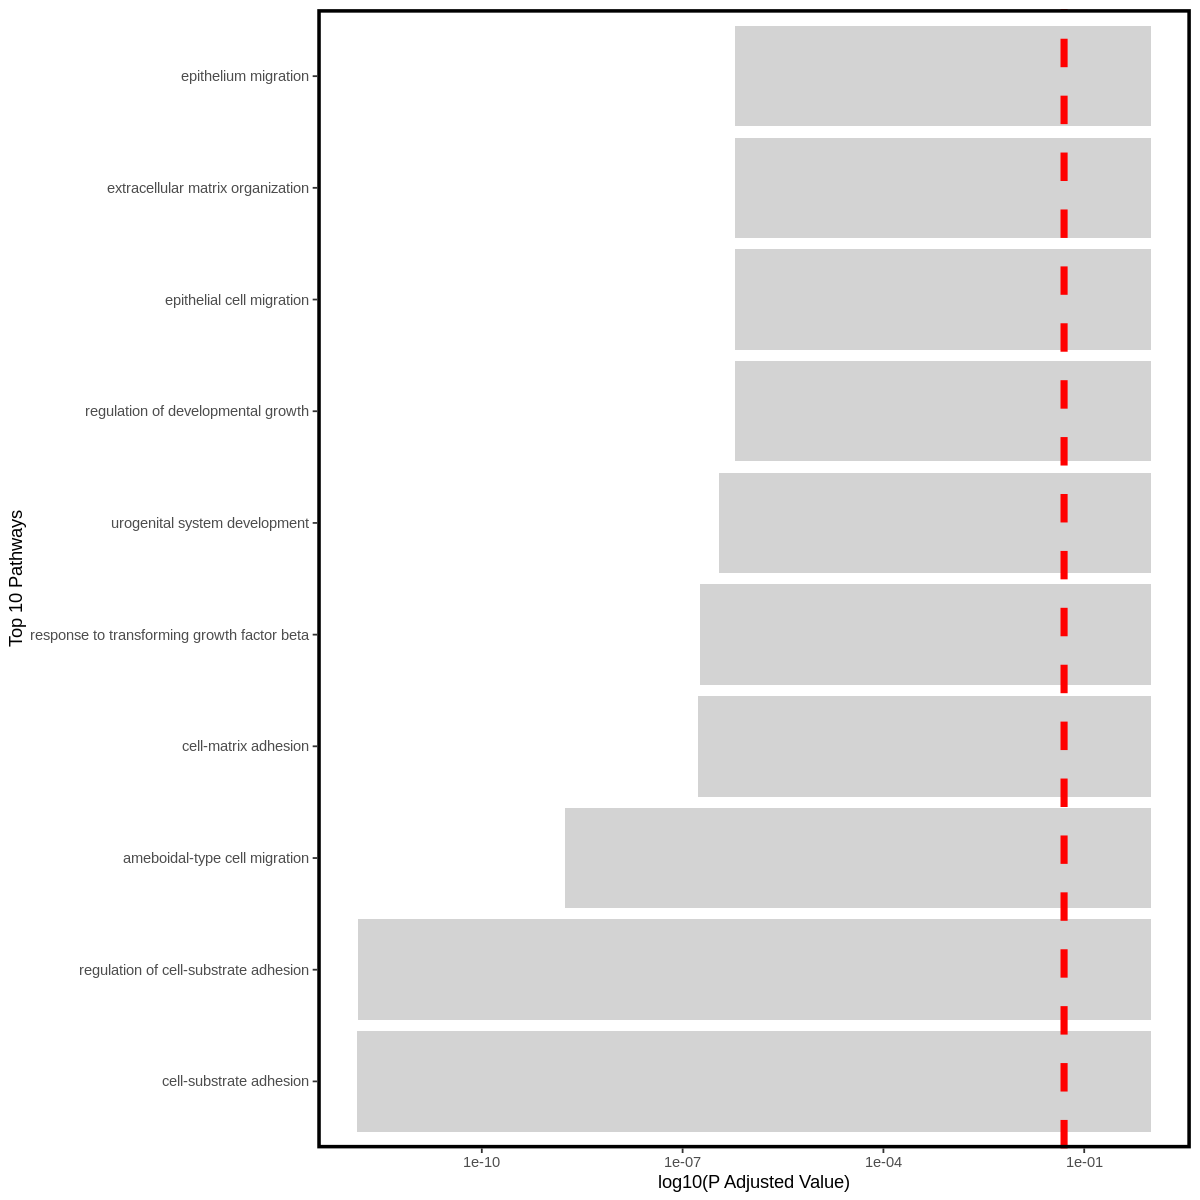

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(go_1_sub,aes(x = Description, y = p.adjust)) + 
geom_bar(stat = 'identity', fill = 'lightgrey') +
scale_x_discrete(limits = go_1_sub$Description) +
scale_y_continuous(trans = 'log10') +
coord_flip() + 
geom_hline(yintercept=0.05, color = 'red', linetype='dashed', size = 2) + 
xlab('Top 10 Pathways') + ylab('log10(P Adjusted Value)') +
theme_bw() + 
theme(panel.border = element_rect(colour = 'black', size = 2), panel.grid.major = element_blank(),
panel.grid.minor = element_blank())

## Cluster 2

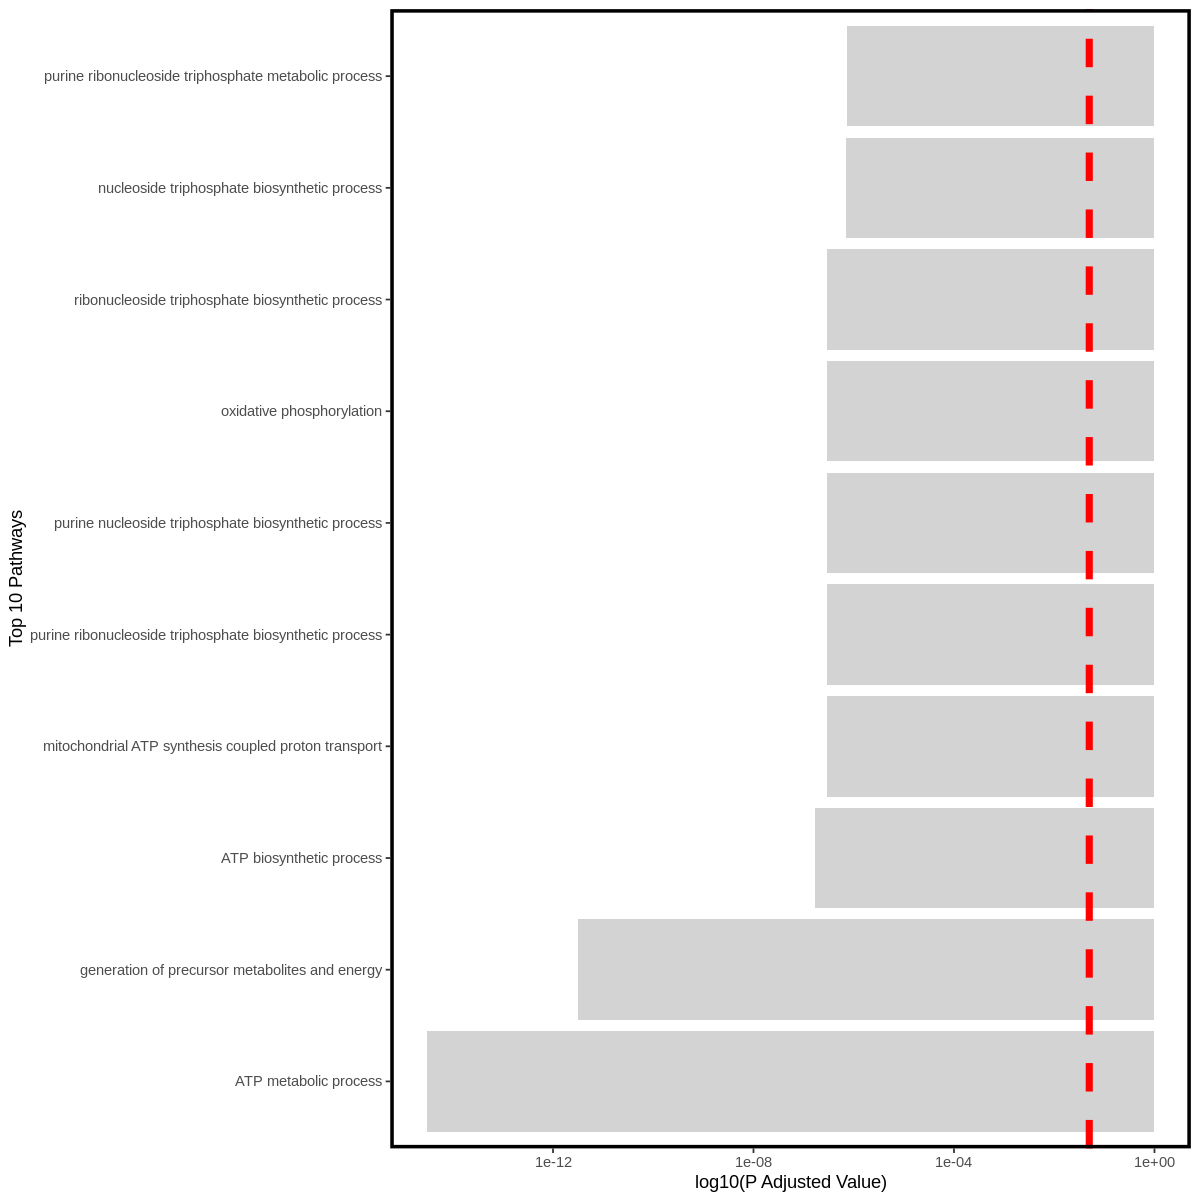

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(go_2_sub,aes(x = Description, y = p.adjust)) + 
geom_bar(stat = 'identity', fill = 'lightgrey') +
scale_x_discrete(limits = go_2_sub$Description) +
scale_y_continuous(trans = 'log10') +
coord_flip() + 
geom_hline(yintercept=0.05, color = 'red', linetype='dashed', size = 2) + 
xlab('Top 10 Pathways') + ylab('log10(P Adjusted Value)') +
theme_bw() + 
theme(panel.border = element_rect(colour = 'black', size = 2), panel.grid.major = element_blank(),
panel.grid.minor = element_blank())

# Heatmap of the genes in the pathways showing their upregulation or downregulation for the MEF No Dox cluster 1 and cluster 2

In [ ]:
go1_genes <- unlist(strsplit("Fn1/Fbln2/Itgb1/P4hb/Nid1/Calr/Csf1/Col1a1/Flna/Itgav/Iqgap1/Thbs1/Vcl/Axl/Adam9/Serpine1/Myadm/Sdc4/Nrp1/Phldb2/Npnt/Tnfrsf12a/Spp1/Sparc/Mtdh/Itgb1/Hmga2/Thbs1/Rtn4/Serpine1/Col4a2/Cyp1b1/Tcf4/Nrp1/Tnfrsf12a/F3","/"))

In [ ]:
go2_genes <- unlist(strsplit("Eno1/Aldoa/Pkm/Hspa8/Mif/Gapdh/Atp5b/Atp5h/Atpif1/Atp5o/Atp5j2/Uqcrc1/Cox5b/Ldha/Park7/Atp5d/Tspo/Eno1/Aldoa/Pkm/Mif/Mdh2/Gapdh/Atp5b/Atp5h/Atp5o/Atp5j2/Uqcrc1/Cox5b/Ldha/Park7/Atp5d/Ndufa5/Taldo1", "/"))

In [ ]:
up <- c(rownames(up_1), rownames(up_2))

In [ ]:
up1_sce <- sce[rownames(sce) %in% rownames(up_1),colData(sce)$condition %in% c('MEF_NoDox_1', 'MEF_NoDox_2')]

In [ ]:
up2_sce <- sce[rownames(sce) %in% rownames(up_2),colData(sce)$condition %in% c('MEF_NoDox_1', 'MEF_NoDox_2')]

In [ ]:
up_sce <- sce[rownames(sce) %in% up,colData(sce)$condition %in% c('MEF_NoDox_1', 'MEF_NoDox_2')]

In [ ]:
up_sce

class: SingleCellExperiment 
dim: 249 3535 
metadata(1): curves
assays(3): counts normalized_counts scaled_counts
rownames(249): Cox5b Col5a2 ... mt-Nd4 mt-Cytb
rowData names(6): id name ... is_hvg clusters
colnames(3535): AAACCTGAGGATGTAT-1 AAACCTGAGGCTCAGA-1 ...
  TTTGTCAGTCCTAGCG-1 TTTGTCATCTCCCTGA-1
colData names(8): barcodes group ... cluster condition
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [ ]:
colnames(up1_sce) <- colData(up1_sce)$condition
colnames(up2_sce) <- colData(up2_sce)$condition

In [ ]:
colnames(up_sce) <- colData(up_sce)$condition

In [ ]:
data_genes <- c(colnames(up_sce)[grepl('MEF_NoDox_1', colnames(up_sce))], colnames(up_sce)[grepl('MEF_NoDox_2', colnames(up_sce))])

In [ ]:
str(data_genes)

 chr [1:3535] "MEF_NoDox_1" "MEF_NoDox_1" "MEF_NoDox_1" "MEF_NoDox_1" ...


In [ ]:
subset_up_sce <- up_sce[up, data_genes]

`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



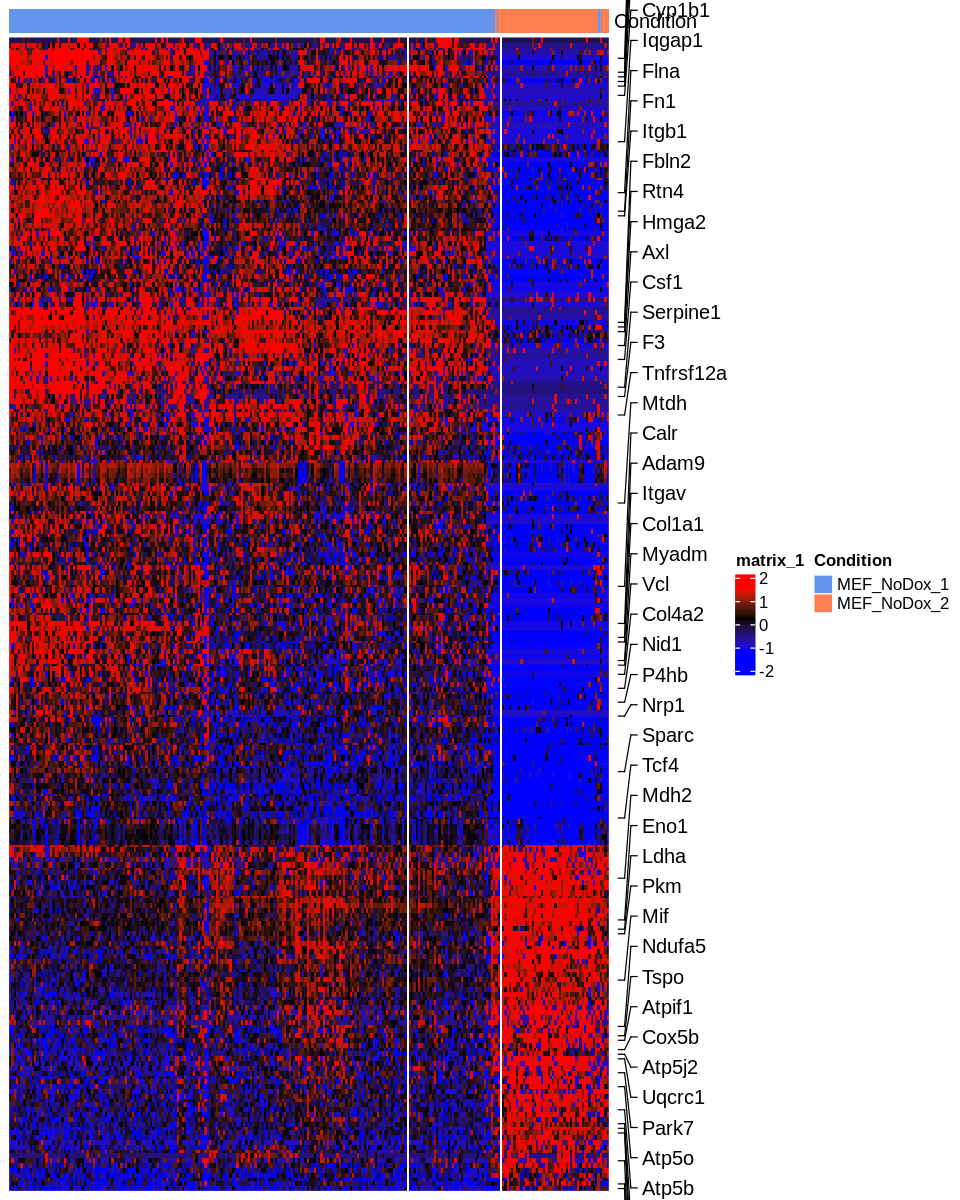

In [ ]:
column_annotation <- HeatmapAnnotation(
  Condition = colnames(up_sce),
  col = list(Condition = c("MEF_NoDox_1" = "cornflowerblue", "MEF_NoDox_2" = "coral")
))

col_fun <- colorRamp2(quantile(assays(up_sce)$scaled_counts, c(0.1, 0.5, 0.9)), c("blue", "black", "red"))

options(repr.plot.width=8, repr.plot.height = 10)
Heatmap(
  assays(up_sce)$scaled_counts,
  cluster_rows = TRUE,
  cluster_columns = TRUE,
  top_annotation = column_annotation,
  show_row_names = TRUE,
  show_column_names = FALSE,
  show_column_dend = FALSE,
  col = col_fun,
  show_row_dend = FALSE,
  row_names_gp = gpar(fontsize = 15)
) +
  rowAnnotation(
    mark = anno_mark(
      at = which(rownames(assays(up_sce)$scaled_counts) %in% unique(c(go1_genes, go2_genes))), 
      labels = rownames(assays(up_sce)$scaled_counts)[rownames(assays(up_sce)$scaled_counts) %in% unique(c(go1_genes, go2_genes))], 
      labels_gp = gpar(fontsize = 12), 
      padding = unit(1, "mm"), 
      which = 'row'
    ) 
  )

In [ ]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] circlize_0.4.13                          
 [2] ComplexHeatmap_2.9.4                     
 [3] magrittr_2.0.1                           
 [4] forcats_0.5.1                            
 [5] purrr_0.3.4                              